In [1]:
%run data_preprocessing.ipynb

<Figure size 640x480 with 1 Axes>

Benin
Statistics=8.803, p=0.012
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Burkina Faso
Statistics=33.110, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Ivory Coast
Statistics=88.425, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Ghana
Statistics=117.618, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Mali
Statistics=1.080, p=0.583
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Mauritania
Statistics=130.257, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Nigeria
Statistics=45.750, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Senegal
Statistics=5.775, p=0.056
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Chad
Statistics=67.856, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Togo
Statistics=102.898, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Cameroun
Statistics=9.514, p=0.009
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Guinea
Statistics=45.050, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Sudan
Statistics=13.657, p=0.001
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Niger
Statistics=103.552, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Centrafrique
Statistics=36.278, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

South Sudan
Statistics=108.957, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Gambia
Statistics=60.517, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Dem. Rep. Congo
Statistics=5.683, p=0.058
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Ethiopia
Statistics=0.431, p=0.806
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Tanzania
Statistics=16.171, p=0.000
Sample does not look Gaussian (reject H0)
13
19
18
10
20
21
9
{0: [11, 14, 12, 18, 15, 25, 20, 17, 24, 15, 20, 16, 17, 11, 9, 16, 15, 12, 14, 17, 20, 18, 16, 14, 17, 14, 65, 63, 37, 57, 44, 28, 9, 5, 7, 5, 8, 5, 6, 5, 11, 10, 9, 6, 7, 10, 11, 10, 8, 0, 5, 6, 9, 7, 12, 12, 6, 67, 46, 31, 74, 61, 59, 15, 23, 23, 26, 33, 52, 26, 15, 25, 14, 19, 28, 20, 23, 15, 19, 0, 21, 18, 28, 31, 85, 83, 84, 65, 71, 71, 16, 16, 22, 22, 15, 31, 31, 24, 29, 22, 31, 37, 40, 30, 16, 14, 15, 18, 27, 16, 23, 29, 25, 20, 92, 99, 66, 72, 117, 72, 13, 5, 10, 12, 14, 12, 11, 11, 10, 11, 4, 1, 13, 14, 6, 8, 2, 2, 5, 2, 9, 0, 8, 17, 11, 10, 6, 16, 20, 24, 0, 4, 8, 7, 8, 17, 15, 9, 20, 14, 13, 14, 17, 6, 3, 9, 3, 6, 7, 6, 7, 9, 3, 6, 6, 7, 3, 24, 19, 26, 19, 21, 55], 1: [88, 97, 100, 100, 99, 76, 127, 129, 141, 164, 186, 216, 197, 166, 163, 135, 104, 84, 66, 47, 45, 44, 27, 27, 34, 143, 155, 101, 140, 25, 118, 34, 50, 58, 76, 89, 104, 91, 86, 109, 138, 122, 91, 130, 121, 123, 117

In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

In [25]:
print(data.head())
data_local = pd.read_csv("../Current_Data/New_data_updated_names.csv", usecols=['Country','Date','Cases','Deaths','Summary'], 
                  parse_dates=["Date"], index_col="Date",header = 0)
data_local.head()

   Country       Date  Cases  Deaths  \
0        0 2014-01-01     11     0.0   
1        1 2014-01-01     88    13.0   
2        5 2014-01-01      3     2.0   
3        7 2014-01-01      3     0.0   
4       12 2014-01-01      0     0.0   

                                             Summary    Bordering Countries  \
0  Two districts crossed the alert threshold at t...        [23, 15, 14, 1]   
1  Two districts crossed the alert threshold at t...  [12, 14, 0, 23, 7, 5]   
2  Two districts crossed the alert threshold at t...             [7, 12, 1]   
3  Two districts crossed the alert threshold at t...          [8, 5, 1, 23]   
4  Two districts crossed the alert threshold at t...  [14, 1, 5, 8, 13, 17]   

   State  
0      1  
1      1  
2      1  
3      0  
4      0  


,Country,Cases,Deaths,Summary
Date,,,,
2014-01-01,Benin,11,0.0,Two districts crossed the alert threshold at t...
2014-01-01,Burkina Faso,88,13.0,Two districts crossed the alert threshold at t...
2014-01-01,Ivory Coast,3,2.0,Two districts crossed the alert threshold at t...
2014-01-01,Ghana,3,0.0,Two districts crossed the alert threshold at t...
2014-01-01,Mali,0,0.0,Two districts crossed the alert threshold at t...


In [26]:
burkina_thresholds = thresholds_weekly_data[1]


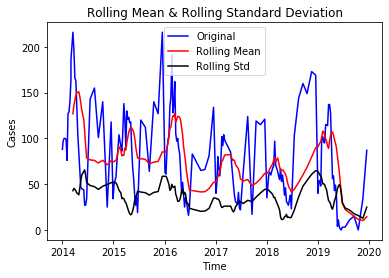

In [57]:
#Start by looking at Burkina Faso
burkina_faso = data.loc[data["Country"] == 1]
burkina_states = burkina_faso["State"]
burkina_states = burkina_states.reset_index(drop=True)
burkina_faso = burkina_faso.drop(columns=["Country", "Deaths", "Summary", "State", "Bordering Countries"])
burkina_faso = burkina_faso.set_index("Date")
plt.ylabel("Cases")
plt.xlabel("Time")
plt.plot(burkina_faso, color = 'blue', label = 'Original')
rolling_mean = burkina_faso.rolling(window=12).mean()
rolling_std = burkina_faso.rolling(window=12).std()
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


We can see that the current data is not stationary (the mean and std is not constant throughout the time), so we will have to apply a transform to make the mean std and constant. We will start with the difference method (subtract each value from the previous timestep) and see whether that makes the data stationary.

In [28]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value[0])
    return pd.Series(diff)

X = burkina_faso.values
#difference data
stationary_data = difference(X)
stationary_data.index = burkina_faso.index[1:]
result = adfuller(stationary_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print(stationary_data)

ADF Statistic: -7.301967
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576
Date
2014-01-06     9
2014-01-13     3
2014-01-20     0
2014-01-27    -1
2014-02-03   -23
              ..
2019-08-15     8
2019-09-16     4
2019-10-16   -15
2019-11-18    34
2019-12-16    53
Length: 177, dtype: int64


Since the statistic is much smaller than the critical values, we can reject the null hypothesis with high confidence and assume that the data is now stationary.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


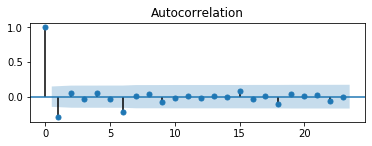

In [16]:
df_log = np.log(burkina_faso)
#Plotting a Autocorrelation function and Partial Autocorrelation Function to determine which previous timesteps 
# most significantly affect the current timestep
plt.figure()
plt.subplot(211)
plot_acf(stationary_data, ax=plt.gca())
plt.show()

The ACF plot shows that adjacent data points are in general very highly correlated. This means that a) using the most recent datapoints will allow the model to produce the best predictions and b) for the future, the model will be able to produce the best accuracy for a prediction no more than 5 weeks in the future. After that correlation between datapoints becomes almost insignificant

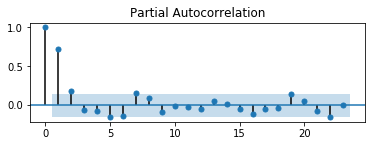

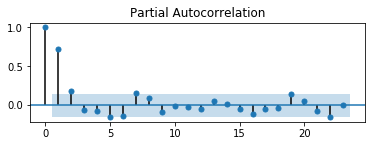

In [17]:
#Visualizing results of the Partial autocorrelation function (removes influence of future timesteps on current timesteps)
plt.subplot(211)
plot_pacf(burkina_faso, ax=plt.gca())

The PACF plot confirms some of the trends in the ACF plot in that adjacent datapoints are highly correlated. Recall that PACF measures the direct correlation between two points (between an observation and its lag) while ACF measures all of the direct and indirect correlations (e.g. t might be affected by t-1 but t-1 is also affected by t-2). However there also seem to be some correlation between datapoints that are five or six weeks apart. It seems like an Autoregressive model of third order would a good starting point for measuring its performance

Below, I will look at monthly correlation data to see if the noise added from differences in temporal time axes (i.e. weekly in beginning of year and monthly near the end) make a difference

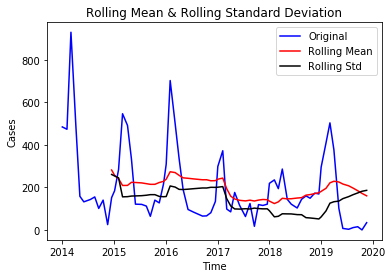

In [18]:
data_month = pd.read_csv("../Current_Data/Month_data.csv", usecols=['Country','Date','Cases','Deaths','Summary'], 
                  parse_dates=["Date"], index_col="Date",header = 0)
burkina_faso_month = data_month.loc[data_month["Country"] == 1]
burkina_faso_month = burkina_faso_month.drop(columns=["Country", "Deaths", "Summary"])
plt.ylabel("Cases")
plt.xlabel("Time")
plt.plot(burkina_faso_month, color = 'blue', label = 'Original')
rolling_mean = burkina_faso_month.rolling(window=12).mean()
rolling_std = burkina_faso_month.rolling(window=12).std()
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

X_month = burkina_faso_month.values
#difference data
stationary_data_month = difference(X_month)

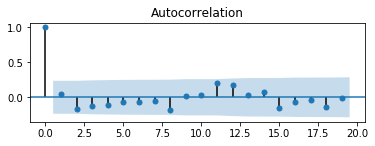

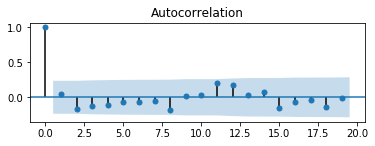

In [19]:
plt.figure()
plt.subplot(211)
plot_acf(stationary_data_month, ax=plt.gca())

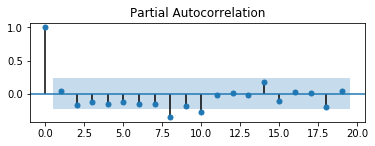

In [20]:
plt.subplot(212)
plot_pacf(stationary_data_month, ax=plt.gca())
plt.show()

There doesn't seem to be a large difference, so we will move forward and test the ARIMA model on the initial data. An ARIMA model takes 3 parameters 
1. p the number of autoregressive terms (the number of previous terms used to predict the current term) 
i.e. p = 1 would be $y_{t}$ = $B_{0}$ + $B_{1}$$x_{t-1}$ This is the Autoregressive part (AR) of ARIMA.
2. d the number of nonseasonal differences needed for stationarity (given that we only used the previous term
to ensure the data was stationary, this would be 1)
3. q the number of lagged forecast errors in the prediction equation/size of moving average window
The q term is used for exponential smoothing i.e. sometimes, taking the most recent prediction may not be the best 
strategy and instead we want to take some kind of average over previous terms to **filter out noise**. This is the MA (moving averages) part of ARIMA.

Now that we've made our data stationary, a potential starting point could be ARIMA (2,1,1)

### Testing on Weekly Data First
*Note when passing in values to ARIMA, you do not need to pass in the stationary data with the differences. The tests above were just to show that differncing by a lag of 1 is enough to make the data stationary. In practice, we directly pass our data and tell ARIMA how much to difference by and it will automatically handle it. This allows us to work with the predicted undifferenced data produced by the model

*Note, with ARIMA, data points need to be equally spaced which may be a source of error given our current data

In [104]:
def compare_predicted_state_to_ground_truth(predicted_no_cases, ground_truth):
    predicted_state = find_state(burkina_thresholds, predicted_no_cases)
    return int(predicted_state == ground_truth)

In [42]:
#preparing data, separating into train, test
X = burkina_faso["Cases"].values
separation = int(len(burkina_faso) * 0.8)

#print out ground truth number of cases for test set
ground_truth = burkina_faso.iloc[separation:].values
# print(ground_truth)

#note must be numpy arrays
train_data = X[:separation]
test_data = X[separation:]
test_states = burkina_states[separation:]
test_states = test_states.reset_index(drop=True)
#fitting model and making predictions
#ARIMA model either accepts a 1D array with values or a 2D dataframe with datetime as the index
predictions = np.array([])
num_correct = 0
for i in range(len(test_data)):
    model = ARIMA(train_data, order=(3, 1, 1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0][0]
    predictions = np.append(predictions, yhat)
    #observation
    obs = test_data[i]
    #append the correct value to the training_data after we have used it so that the model can predict the next value
    #in the series
    train_data = np.append(train_data, obs)
    num_correct += compare_predicted_state_to_ground_truth(yhat, test_states.loc[i])
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
print(model_fit.summary())
# report performance
mse = mean_squared_error(test_data, predictions)
rmse = sqrt(mse)
accuracy = num_correct/len(test_states)
print('RMSE: %.3f' % rmse)
print("Accuracy: %.3f" % accuracy)

>Predicted=125.063, Expected=160
>Predicted=151.392, Expected=149
>Predicted=153.172, Expected=173
>Predicted=167.612, Expected=169
>Predicted=173.172, Expected= 40
>Predicted=86.603, Expected= 53
>Predicted=55.060, Expected= 54
>Predicted=56.667, Expected= 48
>Predicted=48.382, Expected=100
>Predicted=82.521, Expected=102
>Predicted=99.407, Expected= 96
>Predicted=97.075, Expected= 95
>Predicted=96.118, Expected=115
>Predicted=109.444, Expected=115
>Predicted=115.116, Expected=114
>Predicted=114.931, Expected=137
>Predicted=130.973, Expected=137
>Predicted=137.689, Expected=128
>Predicted=132.121, Expected= 90
>Predicted=103.954, Expected= 56
>Predicted=68.689, Expected= 59
>Predicted=59.875, Expected= 43
>Predicted=47.645, Expected= 49
>Predicted=46.468, Expected= 37
>Predicted=39.579, Expected=  4
>Predicted=12.693, Expected= 11
>Predicted=8.008, Expected=  3
>Predicted=3.484, Expected=  1
>Predicted=-0.763, Expected=  0
>Predicted=-2.023, Expected=  3
>Predicted=-0.380, Expected=  

The model seems to perform the best with a window size of 3 (using 3 lagged data points $t_{t-1}$, $t_{t-2}$, $t_{t-3}$).

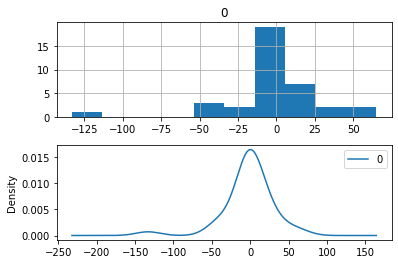

In [43]:
#plotting residuals
residuals = [test_data[i] - predictions[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


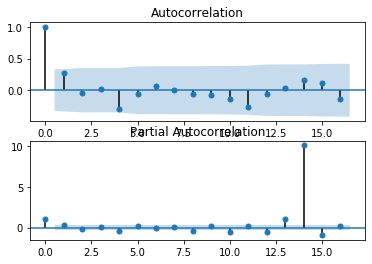

In [44]:
plt.subplot(211)
plot_acf(residuals, ax=plt.gca())
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca())
plt.show()

To extend this to the temporal/time-series patterns across all countries, there are a couple options
1. Implement VAMRA which is a vectorized autoregressive model parameterized by the number of endogenous variables.
https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_varmax.html
2. Hierarchal forecasting - forecast at base level and then at inidividual node/country level using top-down approach
https://stats.stackexchange.com/questions/412276/how-to-handle-many-times-series-simultaneously
How do you determine nodes? Potentially look at clustering/similar countries
3. Amazon's DeepAR Forecasting Algorithm
https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html
4. Prophet

From the research I've conducted, modelling the time-series data for different countries using a single LSTM/RNN network would not be effective in this scenario given the sparsity of our data.

Plotting the data for all of the countries shows that the trend for different countries all share similarities but are each characterized by unique patterns. This makes hierarchcal forecasting a good option since, using a top-down approach, we could divide the list of countries we have into clusters of similar patterns and predict the number of 
cases in each country by moving down our graph from more general (i.e. across meningitis belt) down to clusters and 
eventually down to individual countries.

18


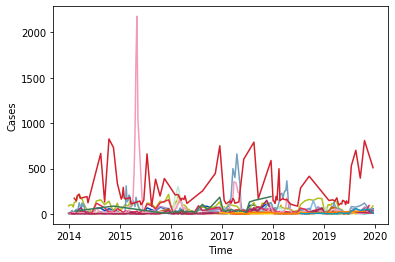

In [112]:
colors = ["#0048BA", "#B0BF1A", "#7CB9E8", "#C0E8D5", "#B284BE", "#72A0C1", "#EDEAE0", "#C46210",
         "#EFDECD", "#E52B50", "#9F2B68", "#F19CBB", "#AB274F", "#D3212D", "#3B7A57", "#FFBF00", "#FF7E00"
         ,"#0D98BA"]
i = 0
for country in data["Country"].unique():
    curr_country = data.loc[data["Country"] == country]
    curr_country = curr_country.drop(columns=["Country", "Deaths", "Summary", "State", "Bordering Countries"])
    curr_country = curr_country.set_index("Date")
    plt.ylabel("Cases")
    plt.xlabel("Time")
    plt.plot(curr_country, color = colors[i], label = 'Original')
    i += 1
print(i)

There are a couple of important questions that need to be tackled using this approach. Maybe the most important oneis  how do we divide our country list into clusters?
1. K-means (but with what - list all of the data then do PCA)
2. Neighboring countries - but how do we determine cutoff points
3. Looking at similar patterns in yearly/seasonal data? With what techniques

R has a package called hts which makes implementing hierarchical forecasting relatively straightforward. Fortunately, there is a python packaged built on top of Prophet (Facebook's time-forecasting software - https://github.com/CollinRooney12/htsprophet) that implements a lot of the core functionality of hts. Information on the top-down approach can be found more extensively here (https://otexts.com/fpp2/top-down.html).

To start with, let us try to use Prophet to model the temporal patterns in the data from Burkina Faso as we did with ARIMA above.

In [140]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.7)
burkina_faso_prophet = burkina_faso.reset_index()
burkina_faso_prophet = burkina_faso_prophet.rename(columns={"Date":"ds", "Cases":"y"})
train_burkina = burkina_faso_prophet[:separation]
test_burkina = burkina_faso_prophet[separation:]
test_burkina = test_burkina.drop(columns=["y"])
test_burkina = test_burkina.reset_index()
#start by fitting the model on a dataframe with two columns: ds (containing dates) and y (containing the numeric data
#we are trying to forecast)
m.fit(train_burkina)
obs = test_states.iloc[-4:].reset_index(drop=True)
print(burkina_faso_prophet.iloc[-4:])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds   y
174 2019-09-16  15
175 2019-10-16   0
176 2019-11-18  34
177 2019-12-16  87


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


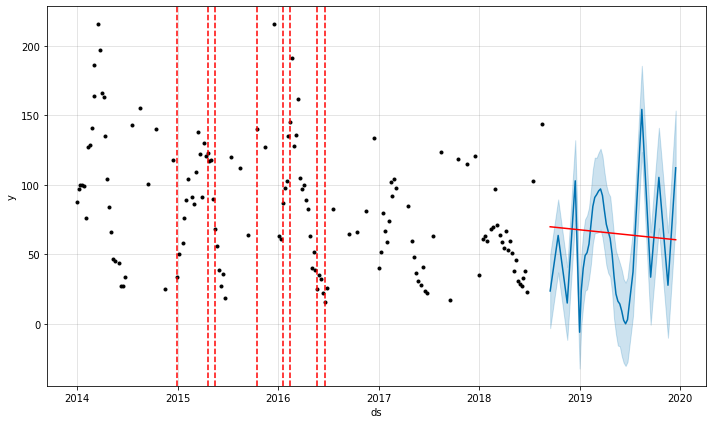

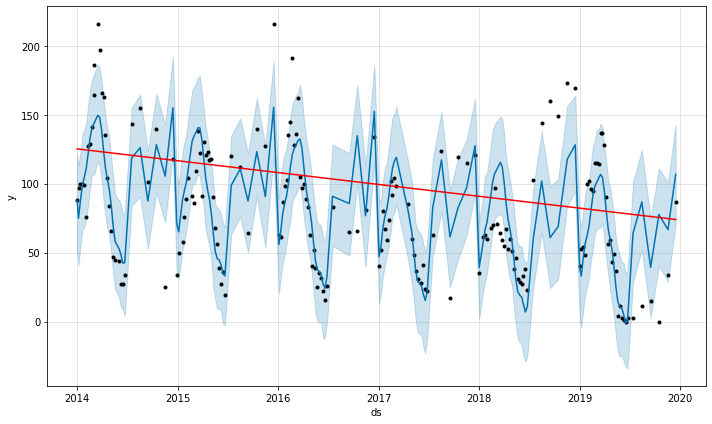

In [141]:
#to forecast, we pass in a dataframe with the dates we want to forecast
future = m.make_future_dataframe(periods=30)

#pass in this dataframe into predict function which returns a new dataframe with a column yhat of predicted values
# as well as columns for uncertainties and confidence levels
forecast = m.predict(test_burkina)
forecast.head()
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

model_fitted_over_entire_data = Prophet()
model_fitted_over_entire_data.fit(burkina_faso_prophet)
forecast_data = model_fitted_over_entire_data.predict(burkina_faso_prophet)
fig2 = model_fitted_over_entire_data.plot(forecast_data)
a2 = a = add_changepoints_to_plot(fig2.gca(), model_fitted_over_entire_data, forecast_data)

In [142]:
#To check accuracy with the model
correct = 0
for i in range(len(forecast)):
    date = forecast.loc[i]["ds"]
    predicted = forecast.loc[forecast["ds"] == date, "yhat"].item()
    correct += compare_predicted_state_to_ground_truth(predicted, test_states.iloc[i])
print(correct/len(forecast))



0.5277777777777778


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

`item` has been deprecated and will be removed in a future version



Notice the accuracy is not that great, but this is the accuracy for the **entire 2019-2020 predicting using only data from 2014-2018**. Plotting the full graph also shows that because of the noise of the data, the curve the model fits does not always get the correct predicted number of cases, but in the second graph notice how the groundtruth values are always within the confidence intervals predicted by the model. This suggests the model is pretty good at predicting the right pattern but forecasting the exact values because of the noise makes it difficult. How can we factor this into the model to improve predictions? 

Can improve the performance by evaluating the noise in the dataset and how it applies to data. The prophet model in general looks like:


y(t) = trend(t) + regressors(t) + holidays(t) + noise
- Trend is fit from the data
- User needs to specify regressors
- Since variance in our data is high, a lot of it will be captured by the noise variable in the prophet model (which is why a lot of the data is within the confidence intervals of the model)
To improve the model, it needs to know that this is not just noise - need to tweak the regressor model accordingly
*Need to figure out what the noise distribution in my dataset looks like - if it's not normal then applying a transformation like log(noise) or something else which makes it more normally distributed will improve the performance of the model 
(https://github.com/facebook/prophet/issues/859)


Important aspects of model that may need to be tweaked
* Prophet uses a Laplacian and double exponential prior to detect sudden/abrupt changes. How does it detect potential for abrupt changes when forecasting? 
    * It automatically detects **potential changepoints**. It then puts a sparse prior on the magnitudes of rates of change. This is similar to L1 regularization to discourage the model from using those points unless necessary. It means that the model generates a large number of places where the model has potential to change but uses few of them
    * Need to think about how to tweak this so that the model is sensitive to changes in the scenario of an outbreak (which mathematically is a change that does not follow previous patterns)
    * By default, model generates potential changepoints **which are spaced uniformly in the first 80% of the training data***
        * This is done so the model has plenty of time/flexibility for its forecast
        * Can change this using changepoint_range= when defining the model with Prophet()
    * Can specify the number of changepoints with n_changepoints
    * Can also specify the trend flexibility using changepoint_prior_scale (default = 0.05) in Prophet()
        * Increasing this will make the trend more flexible at the cost of potentially overfitting (and consequently will increase the uncertainty of our predictions)
        * The red vertical lines show these changepoints
    * Can also manually specify locations for changepoints (using changepoints=[date1, date2, etc.])
        * Slop changes will only be allowed in these locations
    
    

* Prophet uses a linear model for its forecast (no max value)
    * Carrying capacity = maximum value the model can achieve (prophet saturates this point)
    * Can tweak Prophet to use a logistic growth model by specifying a carrying capacity
    * Can also saturate the minimum (at 0 for example)

In [117]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-16,84.784631,27.433103,99.170517,84.784631,84.784631,-23.870694,-23.870694,-23.870694,-3.938721,-3.938721,-3.938721,-19.931973,-19.931973,-19.931973,0.0,0.0,0.0,60.913937
1,2018-10-15,84.102360,31.110162,102.956988,84.102360,84.102360,-15.109253,-15.109253,-15.109253,-18.582022,-18.582022,-18.582022,3.472769,3.472769,3.472769,0.0,0.0,0.0,68.993108
2,2018-11-17,83.325984,81.586860,152.855563,83.325984,83.325984,34.373323,34.373323,34.373323,28.008428,28.008428,28.008428,6.364895,6.364895,6.364895,0.0,0.0,0.0,117.699307
3,2018-12-16,82.643714,93.045314,165.035735,82.643714,82.643714,45.503024,45.503024,45.503024,-3.938721,-3.938721,-3.938721,49.441745,49.441745,49.441745,0.0,0.0,0.0,128.146738
4,2019-01-01,82.267289,1.669030,72.960903,82.267289,82.267289,-43.245875,-43.245875,-43.245875,-10.423695,-10.423695,-10.423695,-32.822179,-32.822179,-32.822179,0.0,0.0,0.0,39.021414
5,2019-01-07,82.126129,-4.282790,67.904378,82.126129,82.126129,-49.064762,-49.064762,-49.064762,-18.582022,-18.582022,-18.582022,-30.482740,-30.482740,-30.482740,0.0,0.0,0.0,33.061368
6,2019-01-14,81.961443,9.389343,81.269769,81.961443,81.961443,-35.924803,-35.924803,-35.924803,-18.582022,-18.582022,-18.582022,-17.342781,-17.342781,-17.342781,0.0,0.0,0.0,46.036641
7,2019-01-21,81.796758,24.537114,90.110365,81.796758,81.796758,-25.298872,-25.298872,-25.298872,-18.582022,-18.582022,-18.582022,-6.716851,-6.716851,-6.716851,0.0,0.0,0.0,56.497885
8,2019-01-28,81.632072,25.154640,100.496049,81.632072,81.632072,-19.439387,-19.439387,-19.439387,-18.582022,-18.582022,-18.582022,-0.857366,-0.857366,-0.857366,0.0,0.0,0.0,62.192684
9,2019-02-04,81.467386,34.572599,102.729710,81.467386,81.467386,-12.380069,-12.380069,-12.380069,-18.582022,-18.582022,-18.582022,6.201953,6.201953,6.201953,0.0,0.0,0.0,69.087317
